In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Load the cleaned dataset
data_path = "../data/combined_cleaned_dataset.csv"  
df = pd.read_csv(data_path)


Data Overview:
                                               title  \
0                                      Subscriptions   
1     Information for CAMHS patients about tribunals   
2  Comparisons of Australian Mental Health Distri...   
3  Trauma lurking in the shadows: A Reddit case s...   
4  Technology in Association With Mental Health: ...   

                                             content  year  \
0  36. Mental Health Act 2001 (Aproved Centres) R...  2008   
1  Thomas et al1 discussed the legal authority fo...  2016   
2  Bayesian nonparametric estimates of Australian...  2021   
3  Childhood Sexual Abuse (CSA) is a menace to so...  2023   
4  This research paper presents a meta-analysis o...  2023   

                                                 url            source  \
0  https://www.semanticscholar.org/paper/3f3db414...  semantic_scholar   
1  https://www.semanticscholar.org/paper/1ec8a4c2...  semantic_scholar   
2                  http://arxiv.org/abs/2106.08047v1

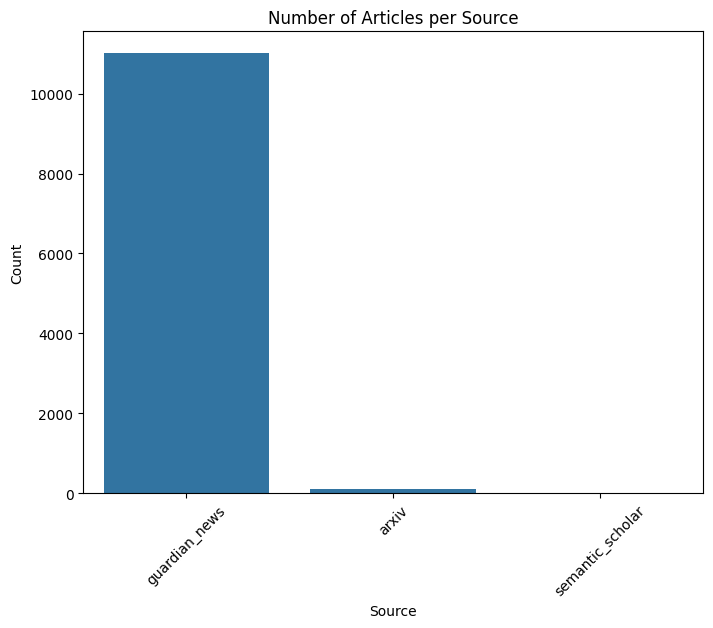

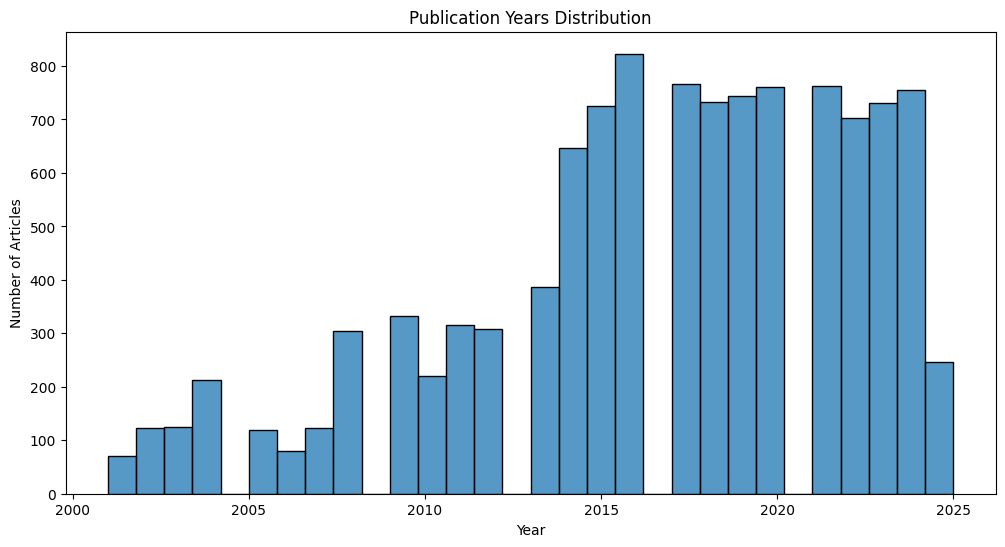

In [5]:

# --- 1. Basic Overview ---
print("\nData Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Articles per Source
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='source', order=df['source'].value_counts().index)
plt.title('Number of Articles per Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Articles per Year
plt.figure(figsize=(12,6))
df['year'] = pd.to_numeric(df['year'], errors='coerce')
sns.histplot(df['year'].dropna(), bins=30, kde=False)
plt.title('Publication Years Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
# --- 2. Term Frequency Analysis ---
all_words = ' '.join(df['clean_text'].dropna())
word_list = all_words.split()
word_counts = Counter(word_list)

# Top 20 words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
# --- 3. Word Cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Corpus')
plt.show()

In [ ]:
# --- 4. Term Evolution Over Time Example ("mental health") ---
# Simple term presence count by year
def count_term_per_year(term, df):
    term_year = {}
    for year in df['year'].dropna().unique():
        texts = df[df['year'] == year]['clean_text'].dropna()
        count = sum(term in text.split() for text in texts)
        term_year[int(year)] = count
    return term_year

mental_health_counts = count_term_per_year('mental', df)  # using "mental" as example

years_sorted = sorted(mental_health_counts.keys())
counts_sorted = [mental_health_counts[year] for year in years_sorted]

plt.figure(figsize=(10,6))
plt.plot(years_sorted, counts_sorted, marker='o')
plt.title('Mentions of "mental" Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles Mentioning "mental"')
plt.grid(True)
plt.show()
